In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\corn.txt",sep=',',names=['Date','Price'])

In [85]:
df.head(5)

,Date,Price
0,2015-01-04,5.21365
1,2015-01-11,5.18130
2,2015-01-18,5.00922
3,2015-01-25,5.00600
4,2015-02-01,4.87080


In [86]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

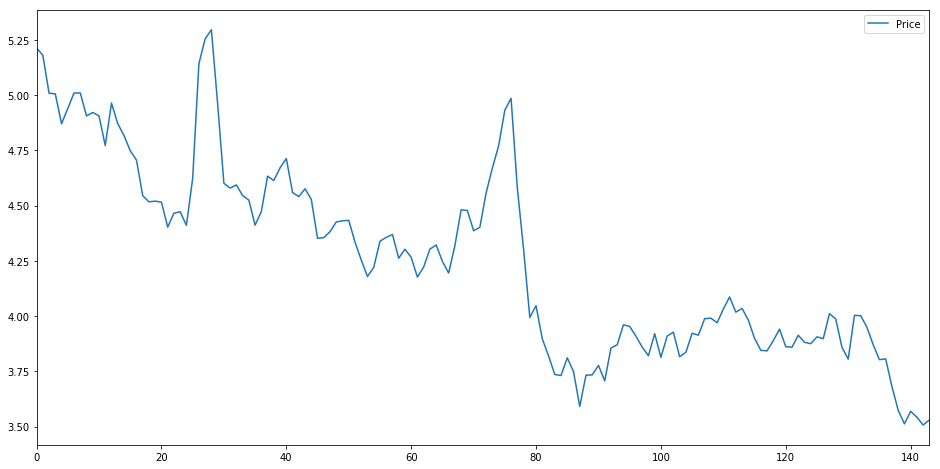

In [87]:
df.plot(figsize=(16,8))

In [88]:
df['Date']=pd.to_datetime(df['Date'])

In [89]:
df.set_index('Date',inplace=True)

In [90]:
from statsmodels.tsa.stattools import adfuller

In [91]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [93]:
adfuller_test(df['Price'])

ADF Test Statistic : -2.290419230755268
p-value : 0.17507658142188115
#Lags Used : 1
Number of Observations Used : 142
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [149]:
df['Diff'] = df['Price'] - df['Price'].shift(5)

In [150]:
adfuller_test(df['Diff'].dropna())

ADF Test Statistic : -5.197648997058163
p-value : 8.889773170918772e-06
#Lags Used : 6
Number of Observations Used : 132
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [169]:
df.tail(20)

,Price,Diff,fore
Date,,,
2017-05-21,3.87524,-0.06576,NaN
2017-05-28,3.90620,0.04462,NaN
2017-06-04,3.89780,0.03836,NaN
2017-06-11,4.01130,0.09772,NaN
2017-06-18,3.98714,0.10560,NaN
2017-06-25,3.85892,-0.01632,NaN
2017-07-02,3.80534,-0.10086,NaN
2017-07-09,4.00340,0.10560,NaN
2017-07-16,4.00200,-0.00930,NaN


In [152]:
import statsmodels.api

In [153]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

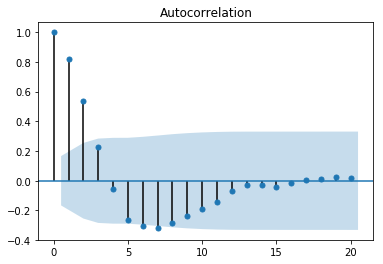

In [154]:
fig = statsmodels.graphics.tsaplots.plot_acf(df['Diff'].dropna(),lags=20)


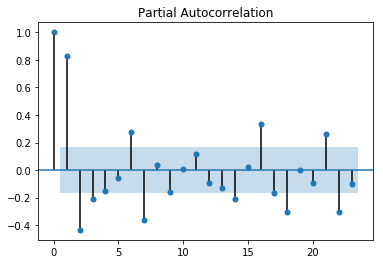

In [155]:
fig=plot_pacf(df['Diff'].dropna(),lags=23)

In [175]:
import statsmodels.api as sm

In [176]:
model=sm.tsa.statespace.SARIMAX(df['Price'],order=(3, 1, 3),seasonal_order=(3,1,3,5))
results=model.fit()

c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


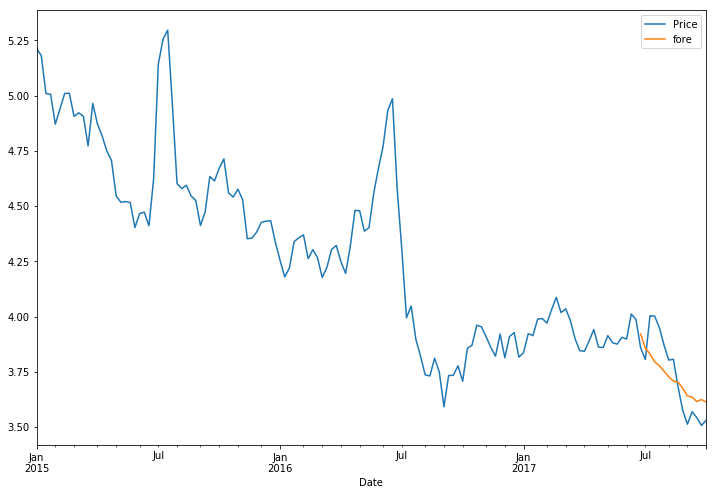

In [177]:
df['fore']=results.predict(start='2017-06-25',end='2017-10-01',dynamic=True)
df[['Price','fore']].plot(figsize=(12,8))